# Life Expectancy Analysis: Global Health & Economic Insights

The quest to understand life expectancy is not just about numbers; it's about the stories they tell of societies, economies, and health systems. In this analysis, I embark on a journey through data, exploring the intricate dance between life expectancy and various socio-economic and health indicators. By employing a blend of time-series forecasting, regression modeling, and data visualization techniques, the aim the analysis is to unravel the complex web of factors that shape the longevity of populations. As I navigate this data-driven narrative, the analysis will uncover patterns, anomalies, and critical intersections that offer a holistic view of global health trends and their implications.

In [1]:
# let's import required libraries for this work
import time
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import missingno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import linregress

In [2]:
# let's load the data from the csv file
file_name = "life_expectancy.csv"
file_dir = "datatest-main/data/"
try:
    main_data = pd.read_csv(f'{file_dir}{file_name}')
except FileNotFoundError:
    raise Exception("No such file or directory. Please make sure you change the file_name and file_dir parameters accordingly") 

### Understanding the Data

let's first overview the data by the following steps:

- Data Exploration: 
Begin with a high-level overview by checking the head(), tail(), describe(), info() and other functions.
- Metadata Analysis: 
Understand the meaning and relevance of each column.
- Distribution Analysis: 
Plot histograms, box plots, or density plots for continuous variables to understand their distributions. For categorical variables, bar plots can be useful.

In [3]:
main_data.head()

Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                             4.9   3230.0              7.139524   
3                             NaN    520.0              5.865939   
4                             2.8  97200.0              2.484370   

   Education Expenditure %  Unemployment  Corruption  Sanitation    Injuries  \
0                      NaN     10.809000         NaN         NaN  2179727.10   
1                      NaN      4.004000         NaN         NaN  1392080.71   
2                   3.4587     18.575001         NaN   40.520895   117081.67   
3                      NaN           NaN         NaN   21.788660     1697.99   
4                      NaN      2.493000         NaN         NaN   144678.14   

   Communicable  NonCommunicable  
0    9689193.70       5795426.38  
1   11190210.53       2663516.34  
2     140894.78        532324.75  
3        695.56         13636.64  
4      65271.91        481740.70

In [4]:
# let's understand the big picture of the data we dealing with
print(main_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [5]:
print(f"The columns (features) of our data are:\n{main_data.columns}")

The columns (features) of our data are:
Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')


In [6]:
print(f"The describtion of the these features are:\n{main_data.describe()}")

The describtion of the these features are:
              Year  Life Expectancy World Bank  \
count  3306.000000                 3118.000000   
mean   2010.000000                   69.748362   
std       5.478054                    9.408154   
min    2001.000000                   40.369000   
25%    2005.000000                   63.642000   
50%    2010.000000                   72.168500   
75%    2015.000000                   76.809000   
max    2019.000000                   84.356341   

       Prevelance of Undernourishment           CO2  Health Expenditure %  \
count                     2622.000000  3.154000e+03           3126.000000   
mean                        10.663654  1.574924e+05              6.364059   
std                         11.285897  7.726415e+05              2.842844   
min                          2.500000  1.000000e+01              1.263576   
25%                          2.500000  2.002500e+03              4.205443   
50%                          6.200000  1.020

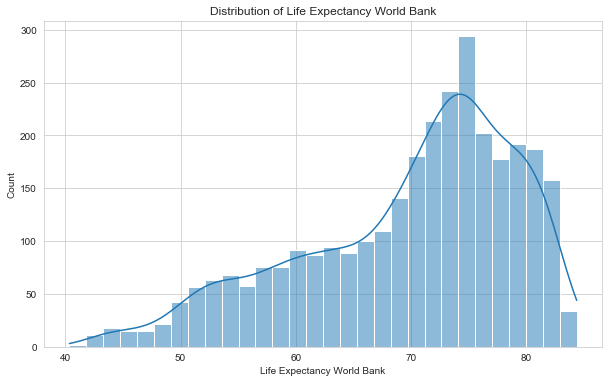

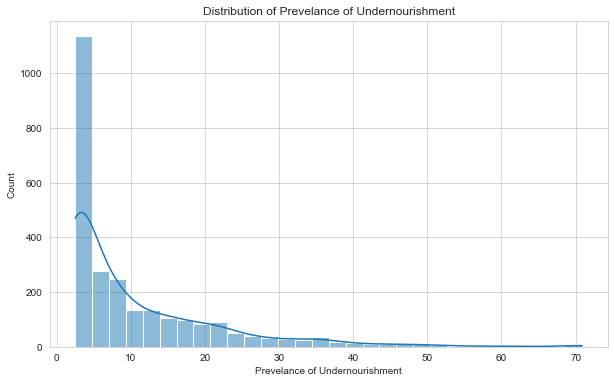

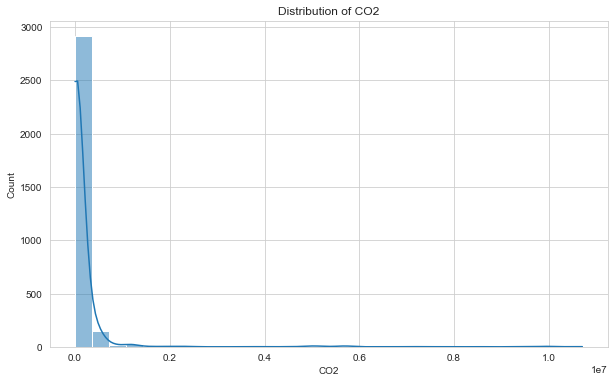

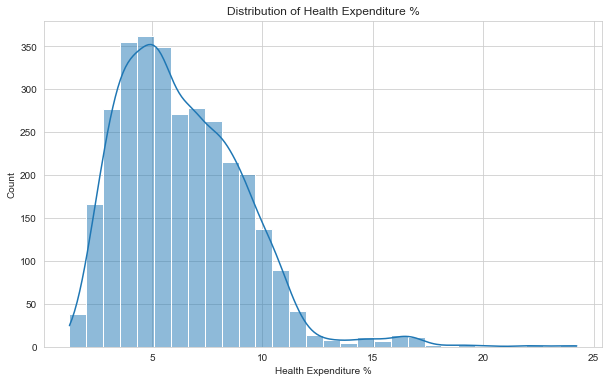

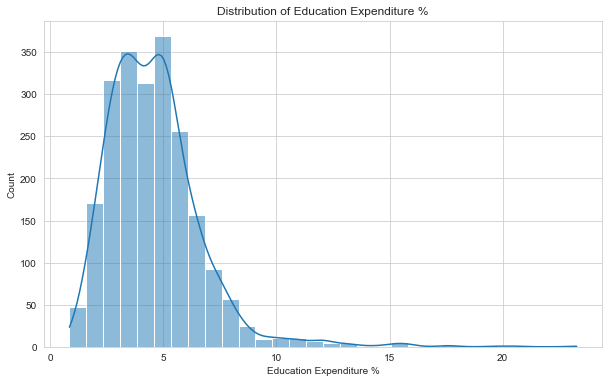

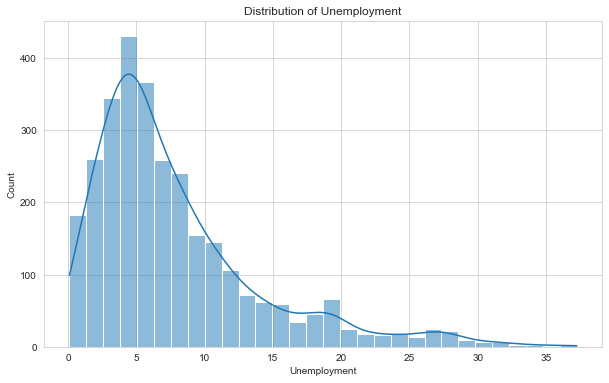

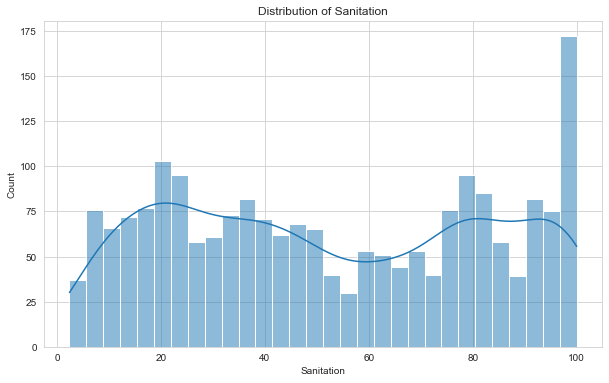

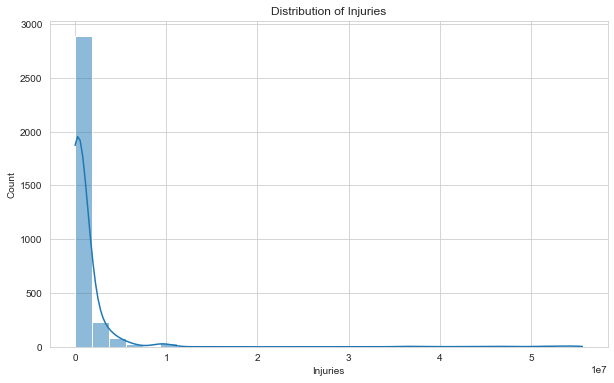

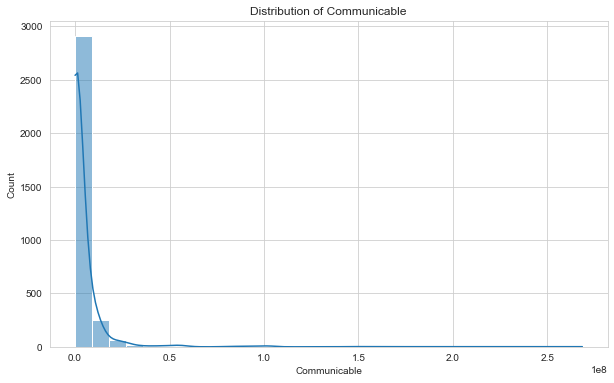

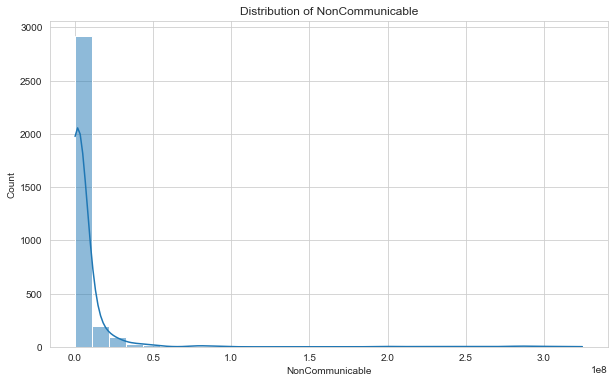

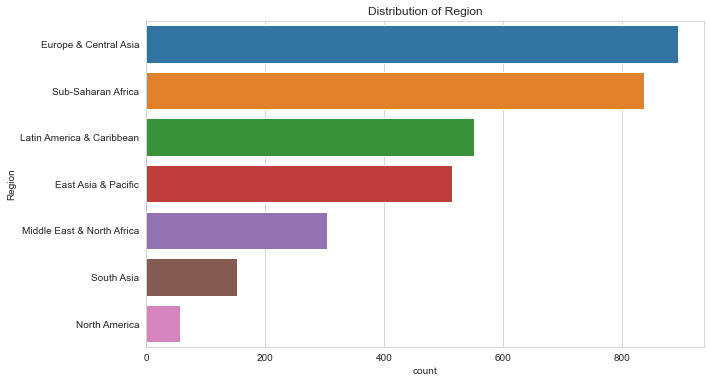

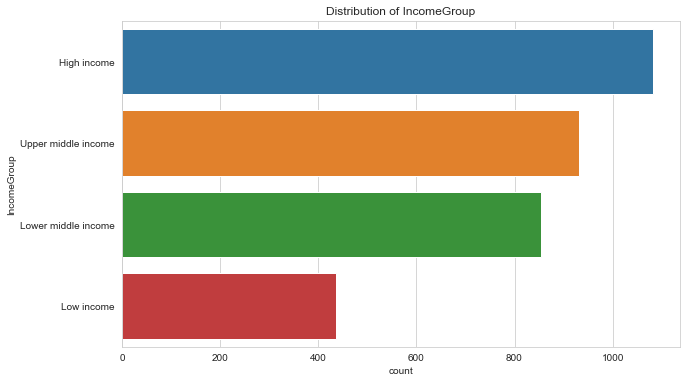

In [7]:
######### Distribution analysis ###########

# Set style for seaborn plots
sns.set_style("whitegrid")

# List of continuous and categorical columns
continuous_cols = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 
                   'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Sanitation', 
                   'Injuries', 'Communicable', 'NonCommunicable']
categorical_cols = ['Country Name', 'Country Code', 'Region', "IncomeGroup"]

# Plotting distributions for continuous columns
for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(main_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting distributions for categorical columns (excluding Country Name and Code for brevity)
for col in ['Region', 'IncomeGroup']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=main_data, y=col, order=main_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

### Dataset Overview:

- The dataset contains 3306 rows and 16 columns.
- The dataset spans 19 years, with data from 174 countries across 7 regions and 4 income groups.
- The dataset contains various metrics related to health, environment, economy, and governance.

### Observations:

- Missing Data: 
There are missing values in several columns. The most significant missing data is in the 'Corruption' column with 2331 missing values, followed by 'Education Expenditure %' and 'Sanitation'. Handling these missing values is crucial.
- Unique Values: 
The 'Country Name' and 'Country Code' columns have 174 unique values each, which is consistent. The 'Region' and 'IncomeGroup' columns have categorical data with 7 and 4 unique values, respectively.
- Data Types: 
Most of the columns are of float64 data type, which indicates continuous variables. There are also some categorical columns (object data type) such as 'Country Name', 'Country Code', 'Region', and 'IncomeGroup'.

### Metadata Analysis

#### Country Name & Country Code:
*Description*: These columns likely represent the name of the country and its corresponding ISO code.
*Relevance*: Useful for identifying and grouping data by country. The code can be especially handy for merging datasets or for visualization tools that require specific country codes.

#### Region:
*Description*: This column categorizes countries into broader geographical or geopolitical regions, e.g., "South Asia", "Sub-Saharan Africa".
*Relevance*: Useful for regional analysis, comparing metrics across broader geographical areas, or understanding regional trends and patterns.

#### IncomeGroup:
*Description*: This categorizes countries based on their Gross National Income (GNI) per capita. Categories might include "Low income", "Upper middle income", etc.
*Relevance*: Provides insights into the economic status of countries. Can be used to analyze how various metrics correlate with economic prosperity.

#### Year:
*Description*: Represents the year for which the data is recorded.
*Relevance*: Essential for time series analysis, understanding trends over time, and making year-on-year comparisons.

#### Life Expectancy World Bank:
*Description*: Represents the average number of years a newborn is expected to live, assuming that current mortality rates remain constant throughout their life.
*Relevance*: A key indicator of health, well-being, and development in a country.

#### Prevalence of Undernourishment:
*Description*: Indicates the percentage of the population suffering from undernourishment.
*Relevance*: A measure of food security and nutritional health in a country.

#### CO2:
*Description*: Likely represents CO2 emissions for the country, possibly in metric tons.
*Relevance*: An environmental metric indicating a country's carbon footprint and its contribution to global warming.

#### Health Expenditure %:
*Description*: Percentage of GDP or national budget spent on health.
*Relevance*: Indicates a country's investment in health, which can correlate with health outcomes.

#### Education Expenditure %:
*Description*: Percentage of GDP or national budget spent on education.
*Relevance*: Reflects a country's investment in education, which can correlate with literacy rates, workforce skills, and overall development.

#### Unemployment:
*Description*: Likely represents the unemployment rate, i.e., the percentage of the labor force that is jobless but seeking employment.
*Relevance*: An economic indicator that can reflect the health of an economy and social well-being.

#### Corruption:
*Description*: Might represent a corruption perception index or some measure of corruption within the country.
*Relevance*: Indicates governance quality, trust in institutions, and can impact foreign investments and economic growth.

#### Sanitation:
*Description*: Could represent access to improved sanitation facilities or a related metric.
*Relevance*: Directly related to public health, as poor sanitation can lead to diseases.

#### Injuries, Communicable, NonCommunicable:
*Description*: These columns might represent the number or rate of injuries and diseases (either communicable like infectious diseases or non-communicable like heart disease).
*Relevance*: Provides insights into public health challenges, healthcare needs, and potential areas of intervention.


based on the observation, we must start with cleaning the data and handling the missing values
let's see the summary of the NA values we got
Let's the *missingno* package to further invistigate the missing values in the dataset.

In [8]:
main_data.isna().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

<AxesSubplot:>

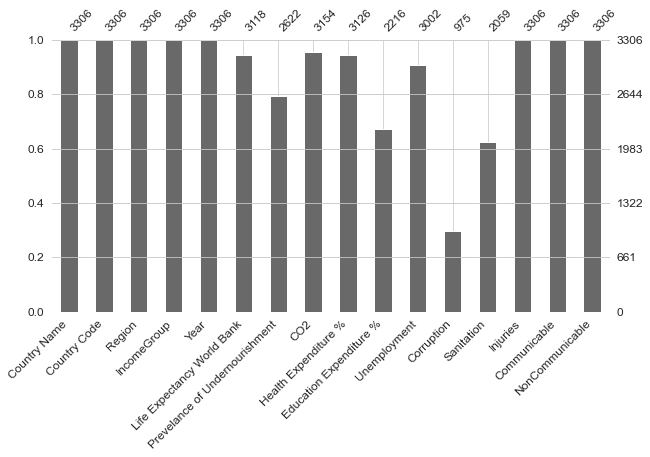

In [9]:
# visualize how complete is the data in each feature?
missingno.bar(main_data, figsize=(10, 5), fontsize=12)

<AxesSubplot:>

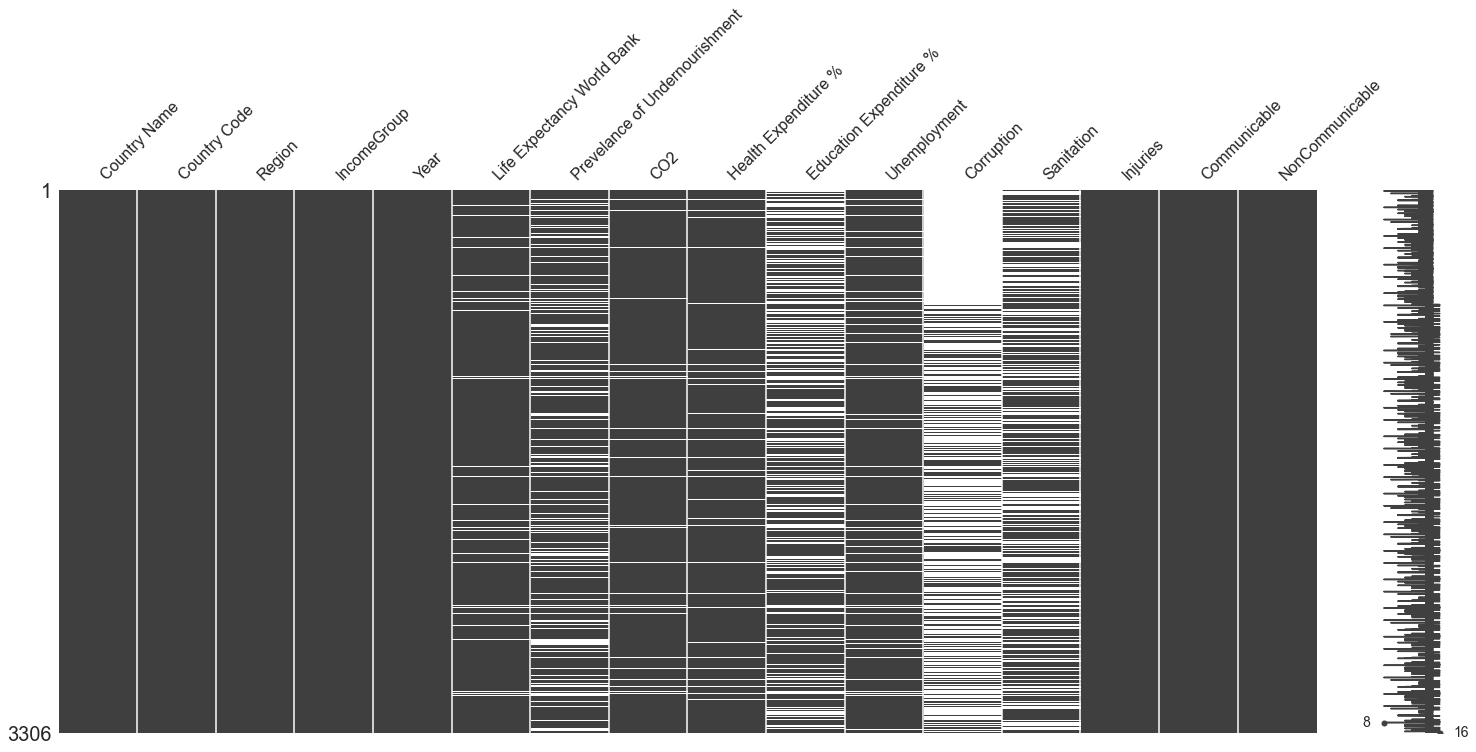

In [10]:
# to understand the continuiting of the missing values, let's plot the metrics of 
missingno.matrix(main_data)

<AxesSubplot:>

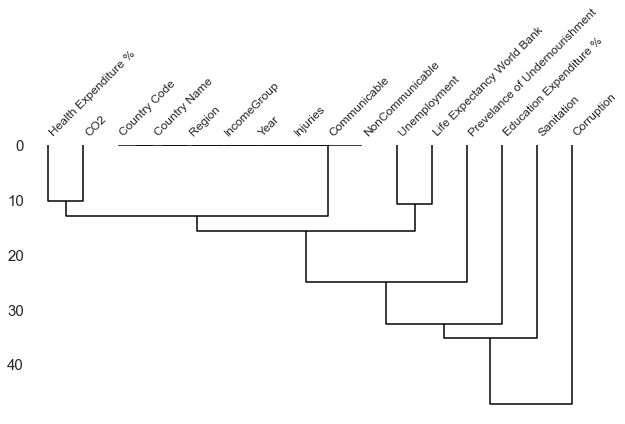

In [11]:
# to understand the depth of the missing values, let''s run a dendogram 
missingno.dendrogram(main_data, figsize=(10, 5), fontsize=12)

### Strategies to Handle Missing Data:
- Drop Missing Values
- Impute with Mean/Median/Mode
- Predictive Imputation
- Forward Fill or Backward Fill


#### Recommendations for this Dataset:
- Columns such as Life Expectancy World Bank, CO2, and Health Expenditure % have very low NA percetage, and we can fill the NA values with the mean of the data
- Columns such as Unemployment, Prevelance of Undernourishment, and Education Expenditure % have relatively higher percentage of missing values, but with the help of machine learning, we can fill up the msssing data
- The Corruption column, however, has a huge NA values, which makes it difficult to Impute. We will drop this column from our analysis



In [12]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# We'll focus on columns with numerical data for imputation
numerical_cols = ['Life Expectancy World Bank', 'Prevelance of Undernourishment',
                  'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 
                  'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']

# drop the Corruption feature
main_data_cleaned = main_data.drop(['Corruption'], axis=1)

# Apply imputer
main_data_cleaned[numerical_cols] = imputer.fit_transform(main_data_cleaned[numerical_cols])

print(main_data_cleaned.isna().sum())


Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64


Based on the meta analysis, the IncomeGroup data is important, however, it is a categorical data.
We can transform the data to numirical data to perform the correlation between it and other features in the dataset by adding the *IncomeGroupCode*


In [13]:
numerical_cols.append('IncomeGroupCode')
main_data_cleaned['IncomeGroupCode'] = main_data_cleaned['IncomeGroup'].replace(['Low income', 
                                                                                 'Lower middle income', 
                                                                                 'Upper middle income', 
                                                                                 'High income'], [1, 2, 3, 4])

### Correlation Analysis
Now, to understand a deeper view of the data, let's see the relationships between the features

Text(0.5, 1.0, 'Correlation Heatmap')

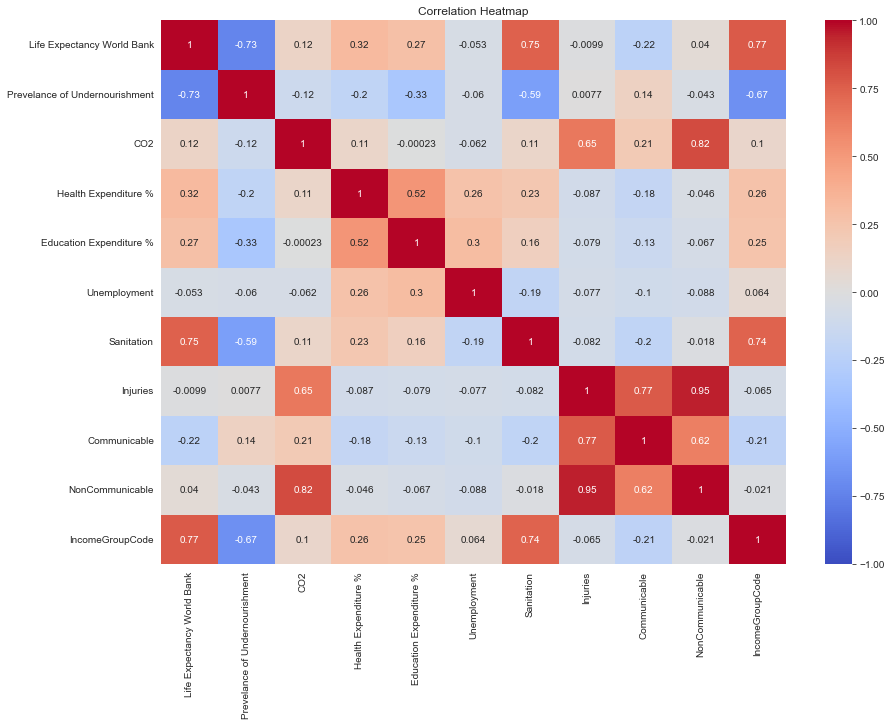

In [14]:
# Compute the Correlation Matrix
correlation_matrix = main_data_cleaned[numerical_cols].corr()

# Visualize the Correlation Matrix using Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")

#### Correlation Interpretation:
- Strong Positive Correlation: 
Values close to 1 indicate a strong positive linear relationship between two variables. As one variable increases, the other also tends to increase.
- Strong Negative Correlation: 
Values close to -1 indicate a strong negative linear relationship. As one variable increases, the other tends to decrease.
- Weak or No Correlation: 
Values close to 0 indicate a weak or no linear relationship between variables.

*Let's Deep Dive into the strong positive/negative correlations*

In [15]:
# Threshold for strong correlations (both positive and negative)
threshold = 0.7

# Identify pairs with strong correlations
strong_correlations = {}
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > threshold and idx != col:
            # To ensure there are no double-count pairs
            if (col, idx) not in strong_correlations and (idx, col) not in strong_correlations:
                strong_correlations[(idx, col)] = correlation_matrix.loc[idx, col]
for key, value in strong_correlations.items():
    print(f'There is a strong {"positive" if value>0 else "negative"} correlation ({round(value, 3)}) between {key[0]} and {key[1]}')

There is a strong negative correlation (-0.728) between Prevelance of Undernourishment and Life Expectancy World Bank
There is a strong positive correlation (0.748) between Sanitation and Life Expectancy World Bank
There is a strong positive correlation (0.773) between IncomeGroupCode and Life Expectancy World Bank
There is a strong positive correlation (0.82) between NonCommunicable and CO2
There is a strong positive correlation (0.738) between IncomeGroupCode and Sanitation
There is a strong positive correlation (0.773) between Communicable and Injuries
There is a strong positive correlation (0.953) between NonCommunicable and Injuries


In [16]:
# Visualize these strong correlations

# to ease the interpretation of the visualization, we can groupby the data by the country name
country_means = main_data_cleaned.groupby('Country Name').mean().reset_index()

# we need these funtions for grouping the important categorical data, such as IncomeGroup and Region
# Check if the IncomeGroup is consistent for each country
def get_income_group(data):
    unique_groups = data['IncomeGroup'].unique()
    if len(unique_groups) == 1:
        return unique_groups[0]
    else:
        # Handle inconsistency - for now, we'll just return the first value
        # but you can modify this as needed
        return unique_groups[0]
    
# Check if the Region is consistent for each country
def get_region(data):
    unique_regions = data['Region'].unique()
    if len(unique_regions) == 1:
        return unique_regions[0]
    else:
        return unique_regions[0]
    

country_means['IncomeGroup'] = main_data_cleaned.groupby('Country Name').apply(get_income_group).reset_index(drop=True)

country_means['Region'] = main_data_cleaned.groupby('Country Name').apply(get_region).reset_index(drop=True)


# Map IncomeGroup to specific sizes
size_mapping = {
    'Low income': 50,
    'Lower middle income': 100,
    'Upper middle income': 150,
    'High income': 200
}
country_means['bubble_size'] = country_means['IncomeGroup'].map(size_mapping)
for pair, corr_value in strong_correlations.items():
    fig = px.scatter(country_means,
                     x=pair[0],
                     y=pair[1],
                     color='Region',
                     size='bubble_size',
                     hover_name='Country Name',
                     hover_data=[pair[0], pair[1], 'Region', 'IncomeGroup'],
                     title=f"Scatter plot between {pair[0]} and {pair[1]} (Correlation: {corr_value:.2f})",
                     color_discrete_sequence=px.colors.qualitative.Set2)

    fig.show()

*NOTE*
Correlation does not imply causation. Just because two variables are correlated doesn't mean one causes the other. External factors, confounding variables, or mere coincidences could be at play.

### Trend Analysis

Grouping data over time periods (e.g., years, months), you can identify trends or patterns.
we can do general and overview trend analysis by aggregating the *Year*, or further deeper trending analysis by aggregating other features, such as IncomeGroup or Region

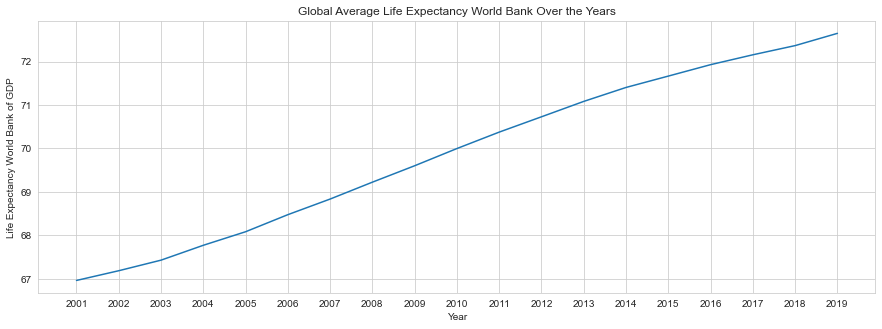

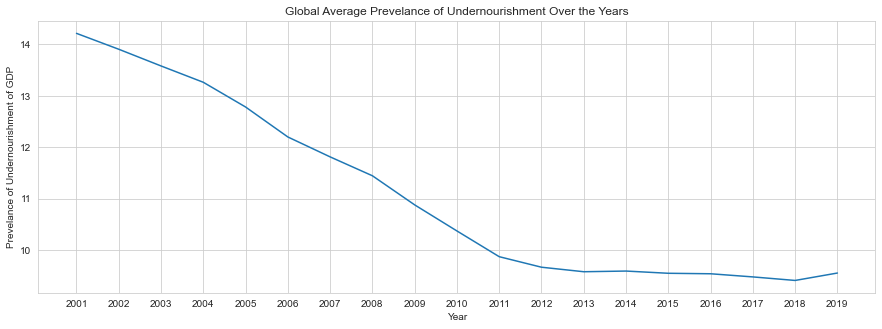

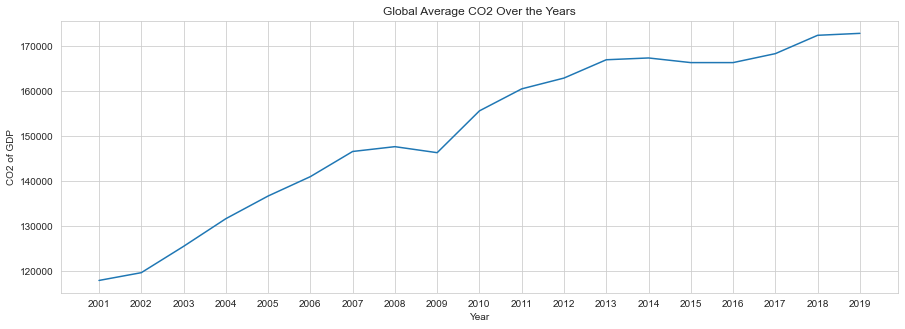

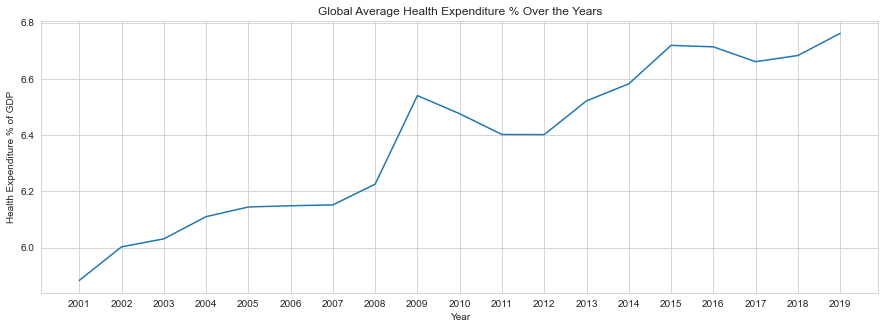

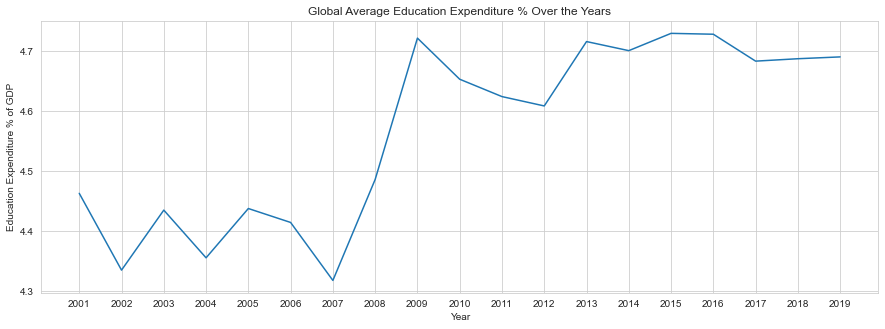

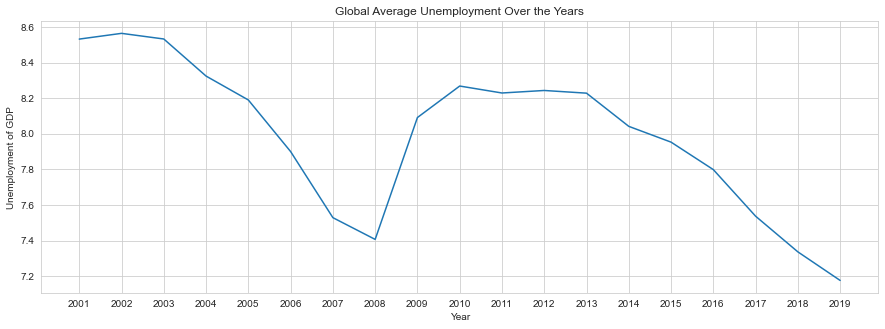

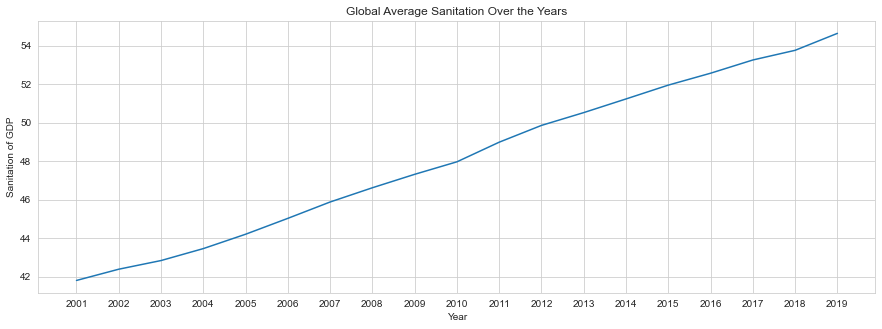

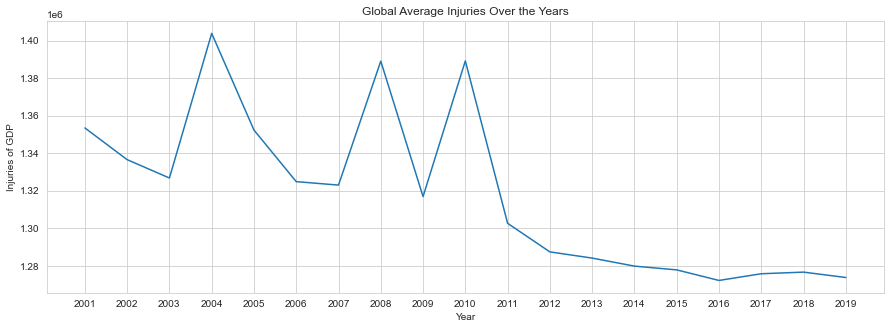

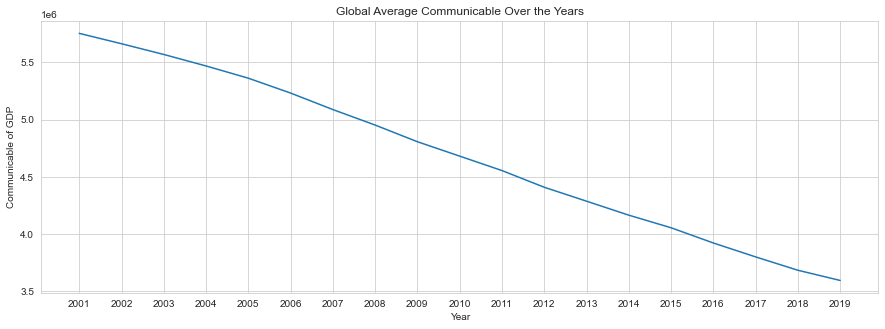

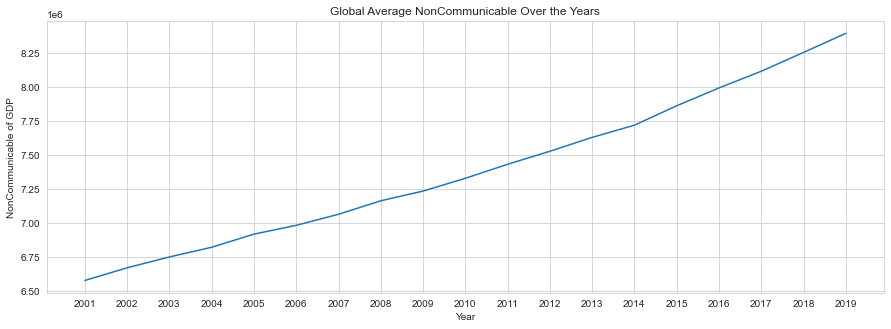

In [17]:
# Filter out only numeric columns for aggregation
numeric_cols = main_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Aggregate by Year for numeric columns
yearly_aggregate = main_data_cleaned.groupby('Year')[numeric_cols].mean()

variables = [
    'Life Expectancy World Bank',
    'Prevelance of Undernourishment',
    'CO2',
    'Health Expenditure %',
    'Education Expenditure %',
    'Unemployment',
    'Sanitation',
    'Injuries',
    'Communicable',
    'NonCommunicable'
]
# since we are looking at the bigger picture now, we will go through all features
for variable in variables:
    
    plt.figure(figsize=(15, 5))
    yearly_aggregate[variable].plot()
    plt.title(f'Global Average {variable} Over the Years')
    plt.ylabel(f'{variable} of GDP')
    plt.xlabel('Year')
    plt.xticks(yearly_aggregate['Year'].unique())
    # plt.tight_layout()
    plt.show()

*Although the trending analysis was general, we can derive the following insights from it:
- Given the upward trend in CO2 emissions, there might be a need for more sustainable practices and policies to mitigate environmental impacts.
- The rise in non-communicable diseases suggests a potential focus area for global health initiatives.
- Overall, the data suggests that there have been significant improvements in global health, nutrition, and sanitation from 2001 to 2019.
- However, challenges related to environmental sustainability and changing health dynamics remain.

### EDA  Panel Data Analysis

The given datset contains time-series across countries, which makes it suitable for panel data.
Let's do the following analysis to further understand the data
- Fixed Effects
- Random Effects
- Lagged Variables
- Differencing
- Temporal Analysis
- Cross-sectional Analysis
- Pooled Analysis

In [18]:
# Fixed Effects
# Select a few countries for visualization
selected_countries = ['Malaysia', 'Egypt', 'Nigeria', 'Tanzania', 'Zambia', 'Malawi', 'Ghana', 'Kenya', 'Bangladesh', 
                      'Cambodia', 'Myanmar', 'India', 'Solomon Islands']

filtered_data = main_data_cleaned[main_data['Country Name'].isin(selected_countries)]

fig = px.line(filtered_data, x='Year', y='Life Expectancy World Bank', 
              color='Country Name', title='Life Expectancy Over Time (Fixed Effects)')
fig.show()


In [19]:
#  Random Effects

# for 2001
year_selected = 2001
data_2001 = main_data[main_data_cleaned['Year'] == year_selected]

fig = px.histogram(data_2001, x='Life Expectancy World Bank', color='IncomeGroup', 
                   title=f'Distribution of Life Expectancy in {year_selected} (Random Effects)')
fig.update_xaxes(range=[40, 85])
fig.show()

# for 2010
year_selected = 2010
data_2010 = main_data[main_data_cleaned['Year'] == year_selected]

fig = px.histogram(data_2010, x='Life Expectancy World Bank', color='IncomeGroup', 
                   title=f'Distribution of Life Expectancy in {year_selected} (Random Effects)')
fig.update_xaxes(range=[40, 85])
fig.show()

# for 2019
year_selected = 2019
data_2019 = main_data[main_data_cleaned['Year'] == year_selected]

fig = px.histogram(data_2019, x='Life Expectancy World Bank', color='IncomeGroup', 
                   title=f'Distribution of Life Expectancy in {year_selected} (Random Effects)')
fig.update_xaxes(range=[40, 85])
fig.show()

In [20]:
filtered_data = main_data_cleaned[main_data['Country Name'].isin(selected_countries)]

fig = px.line(filtered_data, x='Year', y='Health Expenditure %', color='Country Name', 
              title='Health Expenditure % Over Time (Random Effects)')
fig.show()

In [21]:
# Lagged Variables

main_data_cleaned['Lagged_CO2'] = main_data_cleaned.groupby('Country Name')['CO2'].shift(1)

# Scatter plot for CO2 vs. Lagged CO2
fig = px.scatter(main_data_cleaned, x='Lagged_CO2', y='CO2', color='Region', title='CO2 vs. Lagged CO2')
fig.show()

In [22]:
# Differencing
main_data_cleaned['CO2_Difference'] = main_data_cleaned.groupby('Country Name')['CO2'].diff()

filtered_data = main_data_cleaned[main_data['Country Name'].isin(selected_countries)]

# Time series plot for year-on-year change in CO2 for selected countries
fig = px.line(filtered_data, x='Year', y='CO2_Difference', color='Country Name', 
              title='Year-on-Year Change in CO2 Emissions (Differencing)')
fig.show()

In [23]:
# Temporal Analysis

Variable = 'CO2'
fig = px.line(filtered_data, x='Year', y=Variable, color='Country Name', 
              title='CO2 Emissions Over Time (Temporal Analysis)')
fig.show()

In [24]:
#  Cross-sectional Analysis

year_selected = 2019
data_2019 = main_data_cleaned[main_data_cleaned['Year'] == year_selected]


fig = px.histogram(data_2019, x='Health Expenditure %', color='IncomeGroup', 
                   title=f'Distribution of Health Expenditure % in {year_selected} (Cross-sectional Analysis)')
fig.show()

In [25]:
# Pooled Analysis
size_mapping = {
    'Low income': 50,
    'Lower middle income': 100,
    'Upper middle income': 150,
    'High income': 200
}
country_means['bubble_size'] = country_means['IncomeGroup'].map(size_mapping)
fig = px.scatter(country_means, 
                 x='Prevelance of Undernourishment', 
                 y='Life Expectancy World Bank', 
                 color='Region', 
                 size= 'bubble_size',
                 hover_data=['Country Name', 'Region', 'IncomeGroup', 'Prevelance of Undernourishment', 'Life Expectancy World Bank'],
                 title='Health Expenditure % vs. Life Expectancy (Pooled Analysis)')
fig.show()

In [26]:
# panel data plot
fig = px.line(main_data_cleaned, 
              x='Year', y='Life Expectancy World Bank', 
              color='Country Name', 
              facet_col='IncomeGroup', 
              title='Life Expectancy Over Time by Region')
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
)
fig.show()

fig = px.line(main_data_cleaned, 
              x='Year', y='Life Expectancy World Bank', 
              color='Country Name', 
              facet_col='Region', 
              title='Life Expectancy Over Time by Region')
fig.update_layout(
    autosize=False,
    width=1800,
    height=800,
)
fig.show()

In [27]:
# heatmap
chosen_variables = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'Sanitation']
for chosen_varieable in chosen_variables:
    pd.set_option("display.max_rows", 100, "display.max_columns", 20)
    agg_data = main_data_cleaned.groupby(['IncomeGroup', 'Year'])[chosen_varieable].mean().reset_index()
    heatmap_data = agg_data.pivot(index='IncomeGroup', columns='Year', values=chosen_varieable)
    title=f'Average {chosen_varieable} Over Time by Region'
    fig = px.imshow(heatmap_data, title=title)
    fig.show()


#### EDA Interpretation

- Development and Health: 
High-income countries consistently showcase better life expectancy, lower undernourishment, and better sanitation. This underlines the correlation between economic development and health indicators.
- Improvements in Low-Income Countries
Despite challenges, low-income countries have shown remarkable progress, especially in increasing life expectancy and improving sanitation.
- Undernourishment Concerns
While undernourishment has decreased in most groups, the slight increase in 2019 for the low-income group might be a cause for concern and needs further investigation.

##### The results suggests that decision makers should:
- Focus on Sanitation: 
As sanitation directly impacts health, there's a need to continue focusing on improving sanitation, especially in low and lower-middle-income countries.
- Addressing Undernourishment
Continued efforts are needed to address undernourishment, especially in low-income countries. This includes improving agricultural practices, food distribution, and addressing economic disparities.
- Sustainable Development Goals (SDGs)
The data reflects the global push towards achieving the SDGs, especially those related to health, sanitation, and zero hunger. Continued efforts in these directions will be crucial for global well-being.

## Data Modeling

based on the dataset and the above analysis, there are few prospects for potential modeling, including:
- Regression Analysis
- Time Series Forecasting

In [28]:
#  Regression Analysis

# Drop rows with missing 'Life Expectancy World Bank' values
data_clean = main_data_cleaned.dropna(subset=['Life Expectancy World Bank'])

# Fill missing values with mean for other columns
for column in data_clean.columns:
    if data_clean[column].dtype in ['float64', 'int64']:
        data_clean[column].fillna(data_clean[column].mean(), inplace=True)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(data_clean[['Region', 'IncomeGroup']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names(['Region', 'IncomeGroup']))

# Combine the dataframes
data_clean.reset_index(drop=True, inplace=True)
data_encoded = pd.concat([data_clean, encoded_df], axis=1)

# Drop original categorical columns and other non-numeric columns
data_encoded.drop(['Country Name', 'Country Code', 'Region', 'IncomeGroup'], axis=1, inplace=True)

# Split data into training and testing sets
X = data_encoded.drop('Life Expectancy World Bank', axis=1)
y = data_encoded['Life Expectancy World Bank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 14.407452338095764
R^2 Score: 0.8447728232304863


In [30]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                   Coefficient
Year                                  1.100456
Prevelance of Undernourishment       -2.071657
CO2                                  -0.024477
Health Expenditure %                  1.037671
Education Expenditure %               0.001405
Unemployment                         -0.683373
Sanitation                            1.273903
Injuries                              0.307821
Communicable                         -1.612258
NonCommunicable                       2.357528
IncomeGroupCode                       1.469545
Lagged_CO2                           -1.629972
CO2_Difference                       -0.270723
Region_Europe & Central Asia          0.146461
Region_Latin America & Caribbean      0.563481
Region_Middle East & North Africa     0.572962
Region_North America                  0.295170
Region_South Asia                     0.116183
Region_Sub-Saharan Africa            -3.122061
IncomeGroup_Low income               -0.474152
IncomeGroup_L

The results suggests:
- Reducing undernourishment can have a substantial positive impact on life expectancy.
- The negative impact of CO2 suggests that addressing climate change can have health benefits.
- Focus on Nutrition by addressing undernourishment can lead to significant improvements in life expectancy.
- Countries should consider increasing their health expenditure to improve life expectancy
- Improving sanitation can lead to significant health benefits. Countries, especially those lagging, should prioritize sanitation projects
- Special attention and resources might be needed for regions like Sub-Saharan Africa, which show a strong negative impact on life expectancy

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packag

[2.71286136 3.04114412 3.26726222 3.17474769 2.85693136]
LinregressResult(slope=0.04217435639920848, intercept=2.9262406366601765, rvalue=0.2938317893229983, pvalue=0.631337090981843, stderr=0.0792103709143395, intercept_stderr=0.19402499107672558)


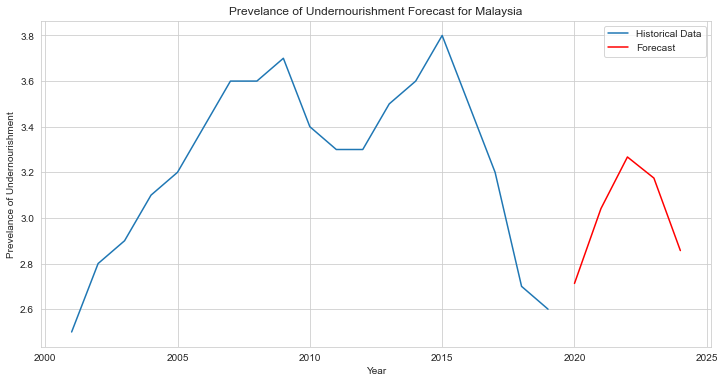

In [31]:
# Time Series Analysis

chosen_country = 'Malaysia'
chosen_variable = 'Prevelance of Undernourishment'
# 1. Data Preparation
chosen_country_data = main_data_cleaned[main_data_cleaned['Country Name'] == chosen_country][['Year', chosen_variable]].set_index('Year')

# 3. Model Selection & Training
model = ARIMA(chosen_country_data, order=(5,1,0))
model_fit = model.fit(disp=0)

# 4. Forecasting
forecast = model_fit.forecast(steps=5)[0]
# 5. Visualization
plt.figure(figsize=(12, 6))
plt.plot(chosen_country_data.index, chosen_country_data[chosen_variable], label='Historical Data')
plt.plot(range(2020, 2025), forecast, label='Forecast', color='red')
plt.title(chosen_variable + ' Forecast for ' + chosen_country)
plt.xlabel('Year')
plt.ylabel(chosen_variable)
plt.legend()
plt.grid(True)
plt.show()

#### Utilizing the slope of forecasting data

A common approach is to utilize the slope of forecasting data from a time-series analysis to flag potential areas of concern.
By examining the frocasting trend of all variables, we can quickly identify whether certain indicators are moving in a favorable or unfavorable direction.
This approach is simple,  proactive, and focus on the Key Indicators directly.

In [32]:
# lest's find all forcasting trends for variables and countries
countries = main_data_cleaned['Country Name'].unique()
main_data_cleaned_forcasting = pd.DataFrame(countries)
variables = [
    'Life Expectancy World Bank',
    'Prevelance of Undernourishment',
    'CO2',
    'Health Expenditure %',
    'Education Expenditure %',
    'Unemployment',
    'Sanitation',
    'Injuries',
    'Communicable',
    'NonCommunicable'
]

def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    if result[1] <= 0.05:
        return True
    else:
        return False

for chosen_variable in variables:
    variable_slopes = []
    for chosen_country in countries:
        # 1. Data Preparation
        chosen_country_data = main_data_cleaned[main_data_cleaned['Country Name'] == chosen_country][['Year', chosen_variable]].set_index('Year')
        
        # 3. Model Selection & Training
        chosen_country_data = chosen_country_data.dropna(subset=[chosen_variable])
        model = ARIMA(chosen_country_data, order=(5,1,0))
        try:
            model_fit = model.fit(disp=0)
            # 4. Forecasting
            forecast = model_fit.forecast(steps=5)[0]
            country_variable_slope = linregress([0,1,2,3,4], forecast).slope
        except:
            country_variable_slope = np.nan
         
                                
        variable_slopes.append(country_variable_slope)
    main_data_cleaned_forcasting[chosen_variable] = variable_slopes

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packag

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:681: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:684: RuntimeWarning:

divide by zero encountered in arctanh

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\s

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored 

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Hamza\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was pro

In [33]:
main_data_cleaned_forcasting.rename(columns={ main_data_cleaned_forcasting.columns[0]: "Country Name" }, inplace = True)
main_data_cleaned_forcasting

Country Name  Life Expectancy World Bank  \
0             Afghanistan                    0.365466   
1                  Angola                    0.450495   
2                 Albania                    0.083273   
3                 Andorra                    0.378191   
4    United Arab Emirates                    0.149022   
..                    ...                         ...   
169               Vanuatu                    0.155141   
170                 Samoa                    0.143764   
171          South Africa                    0.407928   
172                Zambia                         NaN   
173              Zimbabwe                    1.004526   

     Prevelance of Undernourishment          CO2  Health Expenditure %  \
0                          1.538084   354.503329             -0.987622   
1                         -1.705002          NaN             -0.070031   
2                         -0.137499          NaN             -0.091598   
3                         -0.437626    -0.440054              0.055972   
4                          0.049491  4813.138725              0.084241   
..                              ...          ...                   ...   
169                             NaN     4.746074                   NaN   
170                             NaN    14.368295             -0.037401   
171                             NaN  5833.165311              0.082930   
172                       -0.847246          NaN             -0.150119   
173                       -0.665741  -108.618337              0.253672   

     Education Expenditure %  Unemployment  Sanitation       Injuries  \
0                  -0.013616      0.014016    0.672751  166685.293144   
1                  -0.035783      0.225773    1.480470  -12626.535984   
2                   0.069532      0.205222  -27.976030    -588.111538   
3                   0.015636     -0.285924    2.322895       4.496753   
4                  -0.035096     -0.055612    1.907381   13505.990574   
..                       ...           ...         ...            ...   
169                -0.240700      0.000672    0.424870     166.170928   
170                 0.051256      0.244715    0.016547      36.384692   
171                 0.046395      0.026521    0.097474   17077.713623   
172                 0.032366     -0.178385         NaN    6859.845269   
173                 0.122278     -0.035251   -0.321521   10118.049954   

      Communicable  NonCommunicable  
0   -167176.382930     75823.970094  
1   -246804.972737     65491.005495  
2     -2360.682505      5115.503335  
3         5.302617       233.841858  
4              NaN     69819.141063  
..             ...              ...  
169     218.829881      1611.857385  
170            NaN       345.134301  
171 -404583.550113     77798.897145  
172 -256013.491445     59600.196678  
173 -194217.176608     37283.185591  

[174 rows x 11 columns]

In [34]:
main_data_cleaned_forcasting.describe()

Life Expectancy World Bank  Prevelance of Undernourishment  \
count                  136.000000                      132.000000   
mean                     0.210032                       -0.207258   
std                      0.146413                        1.031224   
min                     -0.126581                       -6.778791   
25%                      0.141866                       -0.473749   
50%                      0.188874                       -0.171058   
75%                      0.278991                       -0.014869   
max                      1.004526                        6.705587   

                 CO2  Health Expenditure %  Education Expenditure %  \
count     160.000000            168.000000               164.000000   
mean     3452.776100              0.039484                 0.025143   
std     33728.162392              0.227374                 0.223788   
min    -45371.387529             -1.368786                -0.538329   
25%       -19.657227             -0.035934                -0.060602   
50%        41.811136              0.037616                 0.010244   
75%       568.166808              0.119884                 0.072059   
max    414144.731111              1.239305                 2.109523   

       Unemployment  Sanitation       Injuries  Communicable  NonCommunicable  
count    165.000000  150.000000     160.000000  1.680000e+02     1.620000e+02  
mean       0.024991    0.418700   -8008.270823 -1.189568e+05     1.145700e+05  
std        0.482366    2.443505   90285.340580  5.893436e+05     4.379019e+05  
min       -1.675447  -27.976030 -759257.956352 -7.087150e+06    -6.254025e+04  
25%       -0.142569    0.136349   -2549.183960 -4.310709e+04     6.791702e+02  
50%       -0.008676    0.465594      18.756071 -3.754811e+03     1.551235e+04  
75%        0.109359    0.979401    2264.394376 -5.293902e+01     6.400386e+04  
max        3.340031    3.764784  389466.145688  9.048214e+04     4.180618e+06

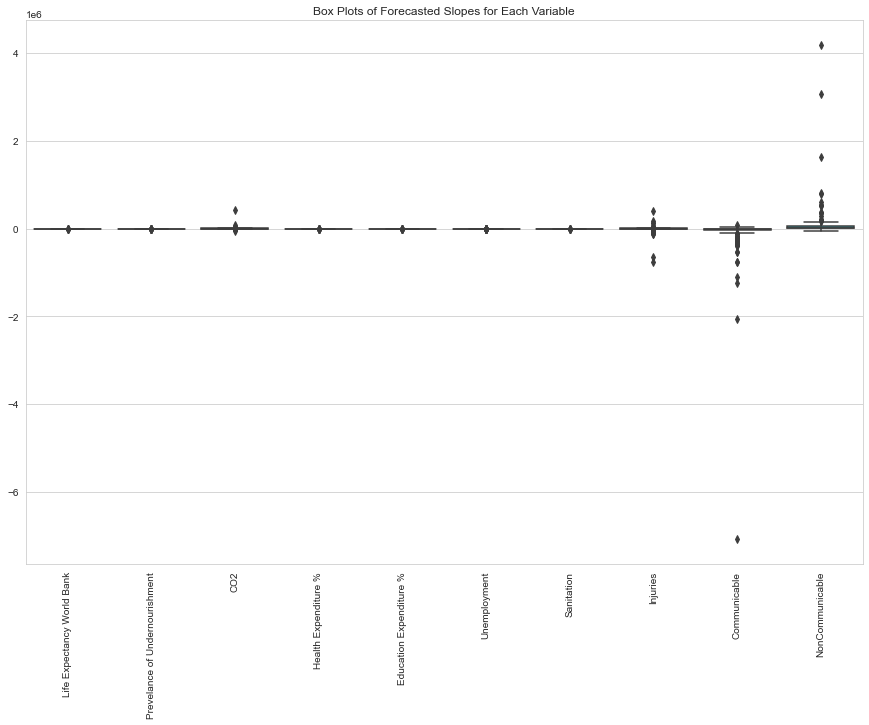

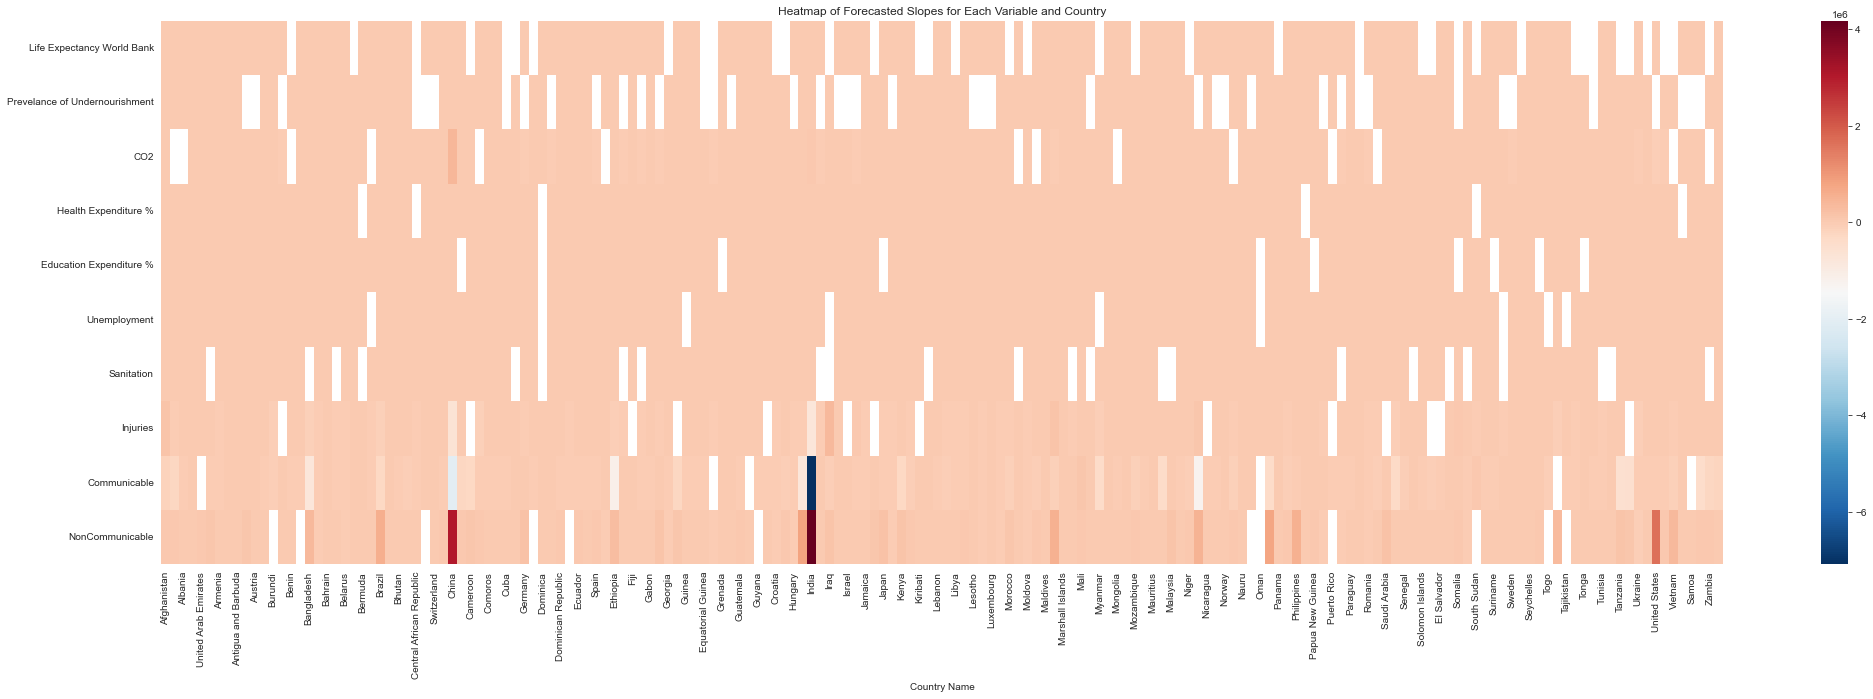

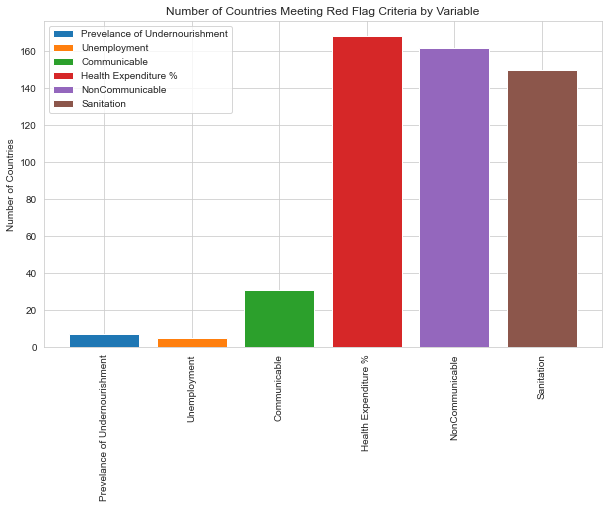

In [35]:
# Set the style
sns.set_style("whitegrid")

# Draw the boxplots for each variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=main_data_cleaned_forcasting)
plt.xticks(rotation=90)
plt.title("Box Plots of Forecasted Slopes for Each Variable")
plt.show()

# Assuming you have a country column in your dataframe
plt.figure(figsize=(35, 10))
sns.heatmap(main_data_cleaned_forcasting.set_index('Country Name').transpose(), cmap="RdBu_r")
plt.title("Heatmap of Forecasted Slopes for Each Variable and Country")
plt.show()


# Criteria for red flags
red_flags = {
    'Prevelance of Undernourishment': (1, None),
    'Unemployment': (1, None),
    'Communicable': (1, None),
    'Health Expenditure %': (None, 0),
    'NonCommunicable': (None, 0),
    'Sanitation': (None, 0)
}

# Filter out countries and variables that meet the red flag criteria
red_flag_data = {}
for variable, (min_val, max_val) in red_flags.items():
    flagged = main_data_cleaned_forcasting[variable].between(min_val if min_val else -float('inf'), max_val if max_val else float('inf'))
    red_flag_data[variable] = main_data_cleaned_forcasting[flagged]['Country Name'].tolist()

# Visualize the red flags
plt.figure(figsize=(10, 6))
for variable, countries in red_flag_data.items():
    plt.bar(variable, len(countries), label=variable)
plt.title("Number of Countries Meeting Red Flag Criteria by Variable")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [36]:
# Criteria for red flags
red_flags = {
    'Prevelance of Undernourishment': (1, None),
    'Unemployment': (1, None),
    'Communicable': (1, None),
    'Health Expenditure %': (None, 0),
    'NonCommunicable': (None, 0),
    'Sanitation': (None, 0)
}

# Function to get top 10 countries based on the criteria
def get_top_countries(variable, min_val, max_val):
    filtered = main_data_cleaned_forcasting[variable].between(min_val if min_val else -float('inf'), max_val if max_val else float('inf'))
    sorted_countries = main_data_cleaned_forcasting[filtered].sort_values(by=variable, ascending=(min_val is not None))['Country Name']
    return sorted_countries.head(10).tolist()

# Extract countries that meet the red flag criteria
red_flag_countries = {}
for variable, (min_val, max_val) in red_flags.items():
    red_flag_countries[variable] = get_top_countries(variable, min_val, max_val)

# Print the countries
for variable, countries in red_flag_countries.items():
    print(f"Countries that raise a red flag in term of {variable}:\n {', '.join(countries)}\n")

Countries that raise a red flag in term of Prevelance of Undernourishment:
 Mali, Madagascar, Afghanistan, Burkina Faso, Pakistan, Ethiopia, Jordan

Countries that raise a red flag in term of Unemployment:
 Greece, Portugal, Spain, Croatia, Cyprus

Countries that raise a red flag in term of Communicable:
 San Marino, Monaco, Andorra, Cyprus, Luxembourg, Poland, Ireland, Seychelles, New Zealand, Vanuatu

Countries that raise a red flag in term of Health Expenditure %:
 Suriname, Greenland, Liberia, Cuba, Libya, Japan, Myanmar, Mozambique, Bahrain, Algeria

Countries that raise a red flag in term of NonCommunicable:
 India, China, United States, Indonesia, Pakistan, Brazil, Philippines, Mexico, Nigeria, Vietnam

Countries that raise a red flag in term of Sanitation:
 China, Romania, Iceland, Peru, Nepal, Andorra, Mexico, Kenya, India, United Arab Emirates



## Analysis Findings

1. Observations:
- There's a clear positive correlation between income groups and life expectancy. High-income countries consistently have higher life expectancies than low-income countries.
- From high-income nations like the United States to low-income countries like Mali, the challenges related to health and socio-economic factors are widespread, indicating that these issues are not confined to any specific income group or region.
- Major countries such as China, India, and the United States have raised concerns in areas of sanitation and non-communicable diseases. Given their significant populations, challenges in these areas can have global ramifications.
- Countries like Greece, Portugal, and Spain have raised red flags for unemployment, suggesting persistent economic challenges in certain parts of Europe.


2. Insights:
*Varied Challenges*: Some countries face predominantly health-related challenges (such as india), while others grapple with socio-economic issues (such as Greece).
*Sanitation's Universal Challenge*: The widespread red flags for sanitation across both developed and developing nations suggest that this is a universal challenge, requiring global attention.
*Regression Analysis*: Variables like 'Prevalence of Undernourishment', 'Unemployment', and 'Communicable' diseases have negative coefficients, suggesting that as these increase, life expectancy might decrease. On the other hand, 'Health Expenditure %', 'Sanitation', and 'NonCommunicable' have positive coefficients, indicating their positive impact on life expectancy.

3. Recommendations:
*Tailored Interventions*: Countries should design interventions based on their unique challenges. For example, nations with sanitation concerns might prioritize infrastructure development, while those with unemployment issues might focus on economic and educational reforms.
*Global Collaboration*: Challenges like sanitation, which are universally prevalent, can benefit from international collaboration, pooling resources, and sharing best practices.
*Focus on Health and Sanitation*: Given the positive correlation between life expectancy and health expenditure, countries should prioritize health and sanitation in their budgets and policies.

4. Prospects:
*Opportunity for Positive Change*: Identifying these red flags provides countries with clear areas of focus. With targeted strategies, there's a significant opportunity for improvement in these domains over time.
*Economic Revival*: Addressing issues like unemployment can catalyze economic growth, benefiting not just individual nations but also contributing to global economic stability.

5. Further Work:
*Detailed Analyses*: A granular analysis can help understand the root causes of these challenges, leading to more effective, targeted interventions.
*Continuous Monitoring*: It's essential to keep monitoring these variables, adjusting strategies based on outcomes, and ensuring that interventions are yielding the desired results.


In conclusion, this comprehensive analysis has shed light on the multifaceted challenges faced by countries worldwide. While the road ahead is filled with challenges, with data-driven strategies and collaborative efforts, there's a strong potential for meaningful progress. As data scientists, our role is not just to provide insights but to ensure that these insights translate into impactful actions, driving positive change in societies globally.

In [37]:
%load_ext watermark
%watermark -v -m -p pandas,matplotlib,seaborn,sklearn,plotly,missingno,statsmodels
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

pandas     : 1.3.4
matplotlib : 3.4.3
seaborn    : 0.11.2
sklearn    : 0.24.2
plotly     : 5.17.0
missingno  : 0.5.2
statsmodels: 0.12.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Sun Oct 08 2023 14:07:34Malay Peninsula Standard Time

